import basic libraries

你们要是看见了能编辑记得打个111啊在这
111111111111111111111111111111111111
11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

1111111111111111

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

read data

In [2]:
mushroom = pd.read_csv('mushrooms.csv')

get basic infor of data

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom.isnull().sum().sum()

0

no null data in the dataset

<h2>Data Clear<h2>

In [6]:
#replace p with 1 and replace e with 0
mushroom['class']=mushroom['class'].replace(['p'],1)
mushroom['class']=mushroom['class'].replace(['e'],0)

In [8]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h3>Data Analysis<h3>

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

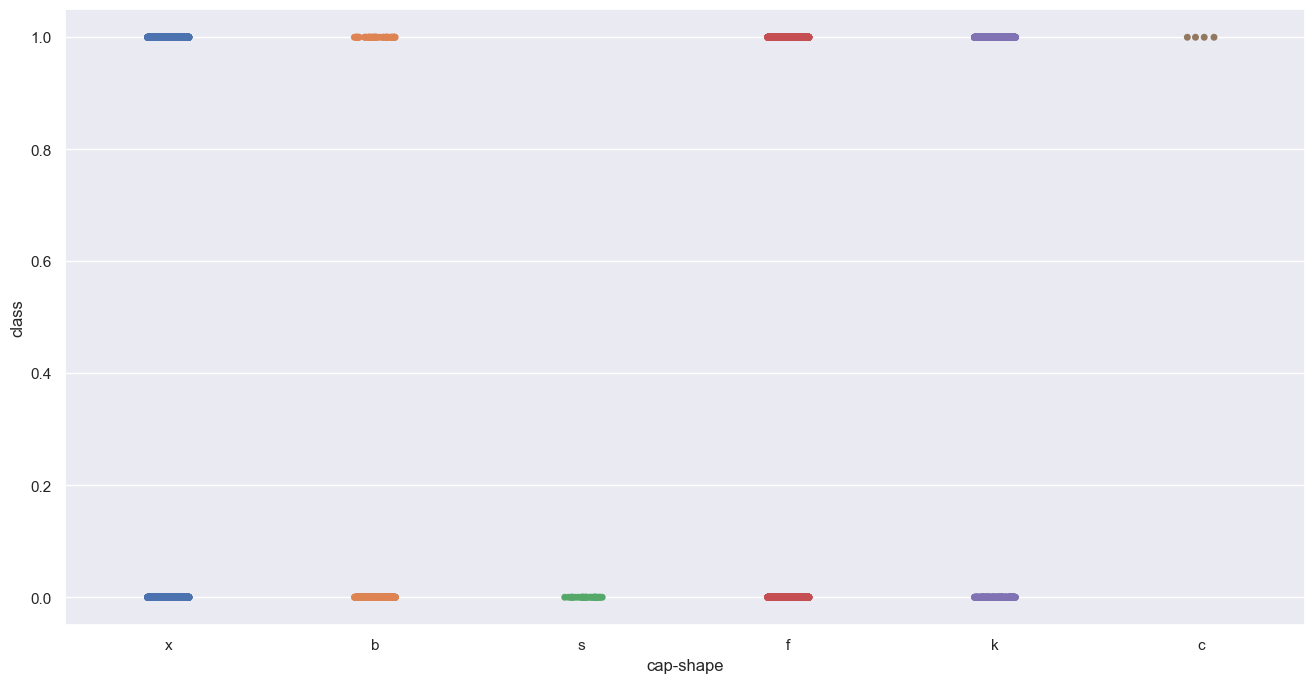

In [11]:

f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'cap-shape', y = 'class', data = mushroom)

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

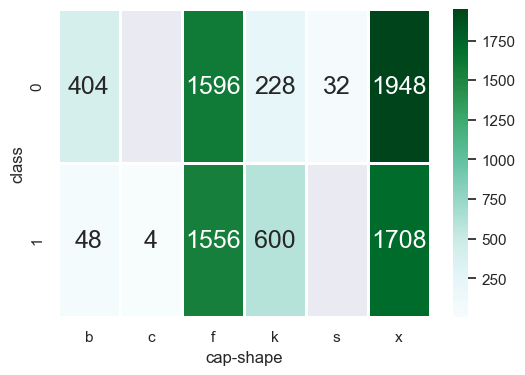

In [13]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(mushroom.groupby(['class', 'cap-shape']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [33]:
mushroom_cat = mushroom[['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]
ohe.fit(mushroom_cat)
mushroom_cat_ohe = pd.DataFrame(ohe.transform(mushroom_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(mushroom_cat.columns))

In [34]:
mushroom_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 7.3 MB


In [35]:
mushroom_res = mushroom['class']
mushroom_ohe = pd.concat([mushroom_cat_ohe, mushroom_res], 
                           sort = False, axis = 1)

[Text(0.5625, 0.9, 'odor_n <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2924, 2762]\nclass = Eatable'),
 Text(0.3125, 0.7, 'stalk-root_c <= 0.5\ngini = 0.282\nsamples = 3225\nvalue = [548, 2677]\nclass = Poisonous'),
 Text(0.1875, 0.5, 'stalk-root_r <= 0.5\ngini = 0.131\nsamples = 2857\nvalue = [201, 2656]\nclass = Poisonous'),
 Text(0.125, 0.3, 'odor_a <= 0.5\ngini = 0.047\nsamples = 2721\nvalue = [65, 2656]\nclass = Poisonous'),
 Text(0.0625, 0.1, 'gini = 0.023\nsamples = 2687\nvalue = [31, 2656]\nclass = Poisonous'),
 Text(0.1875, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]\nclass = Eatable'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]\nclass = Eatable'),
 Text(0.4375, 0.5, 'habitat_d <= 0.5\ngini = 0.108\nsamples = 368\nvalue = [347, 21]\nclass = Eatable'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 347\nvalue = [347, 0]\nclass = Eatable'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = Poisonous'),
 Text(0.8125, 0.7, 'spore-print-color_r <

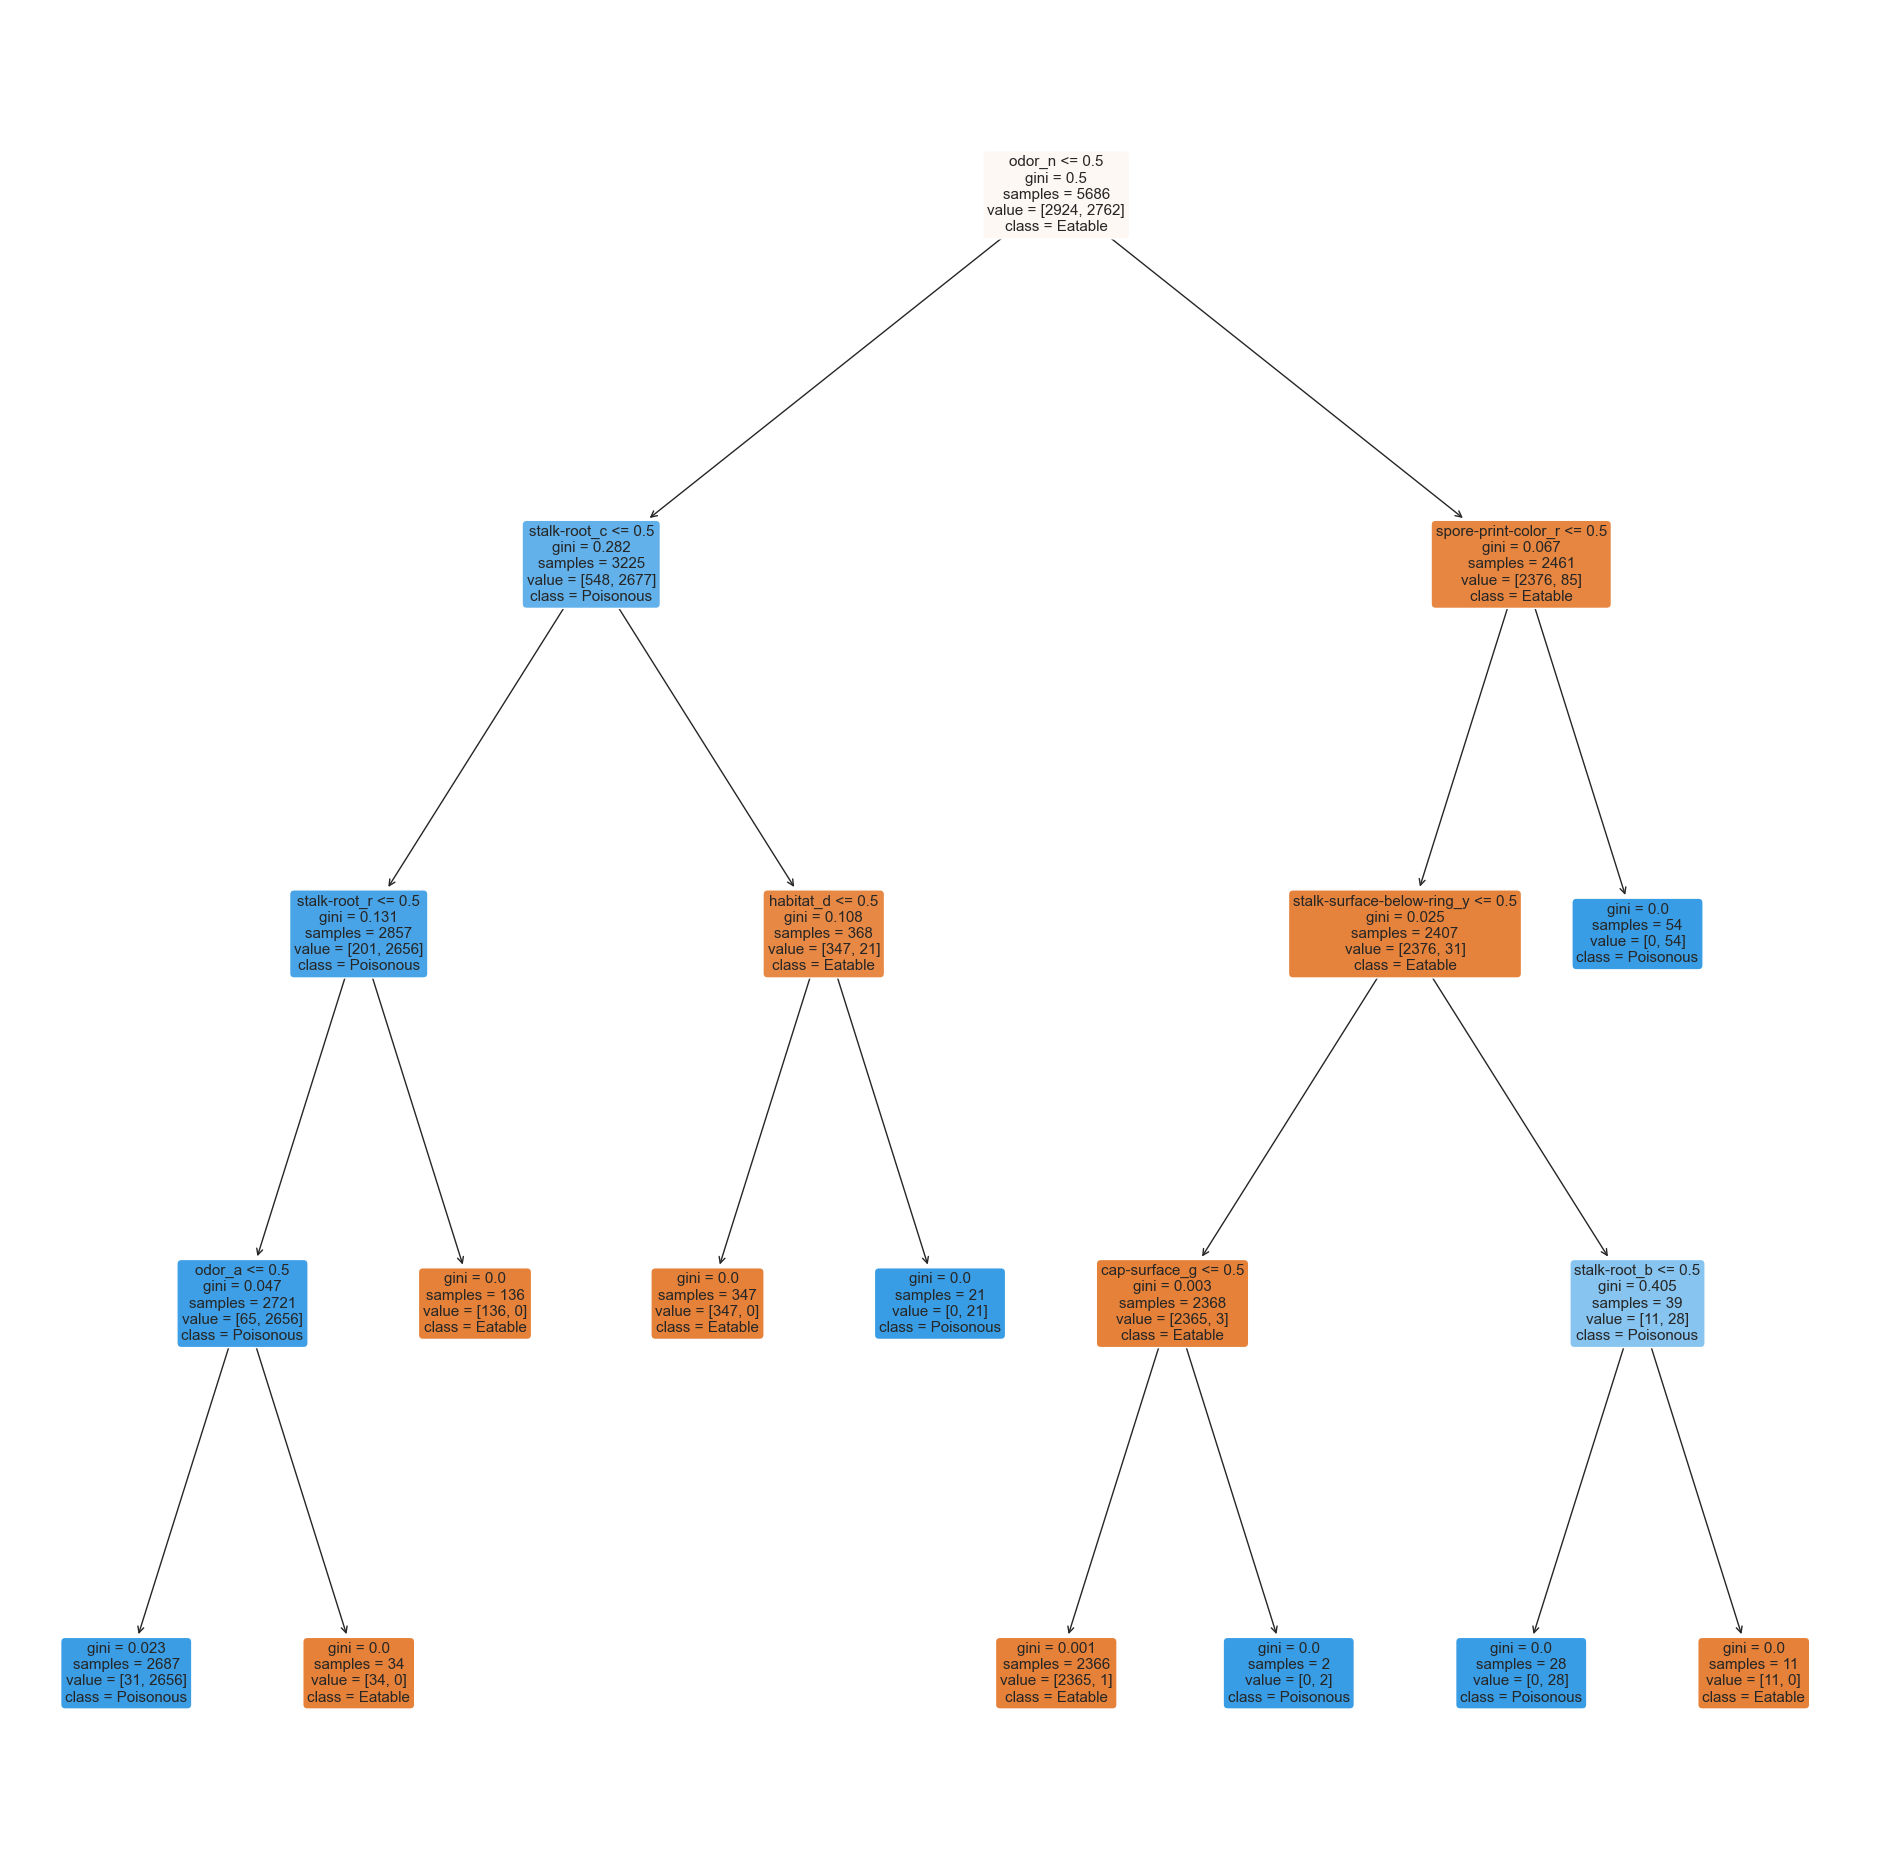

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9943721421034118

TPR Train :	 0.999637943519189
TNR Train :	 0.9893980848153214

FPR Train :	 0.010601915184678522
FNR Train :	 0.0003620564808110065


<AxesSubplot:>

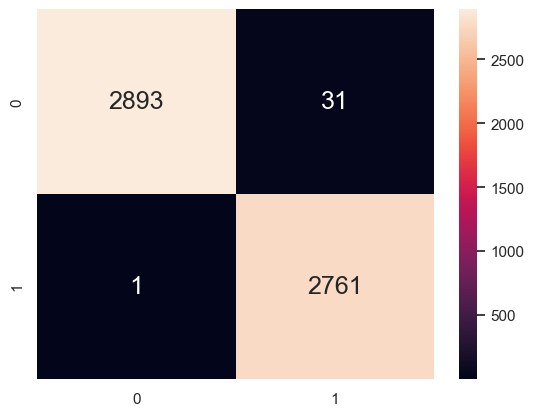

In [37]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9917965545529123

TPR Test :	 0.9974003466204506
TNR Test :	 0.9867601246105919

FPR Test :	 0.0132398753894081
FNR Test :	 0.0025996533795493936


<AxesSubplot:>

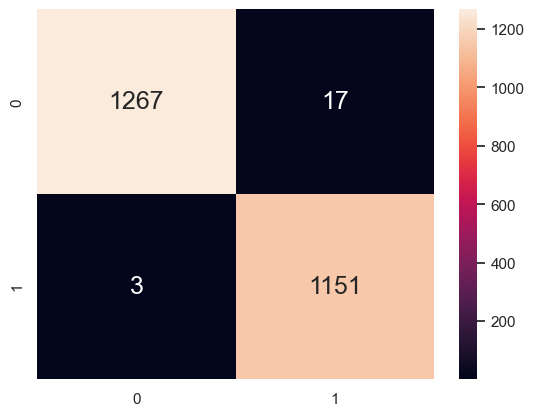

In [38]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
from sklearn.utils import resample

creditBad = creditData_ohe[creditData_ohe.Rating == 'Bad']
creditGood = creditData_ohe[creditData_ohe.Rating == 'Good']
 
# Upsample the Bad samples
creditBad_up = resample(creditBad, 
                        replace=True,                     # sample with replacement
                        n_samples=creditGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
creditData_ohe_up = pd.concat([creditGood, creditBad_up])
 
# Check the ratio of the classes
creditData_ohe_up['Rating'].value_counts()